<a href="https://colab.research.google.com/github/billanel/ProjetIA/blob/main/GoldIA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


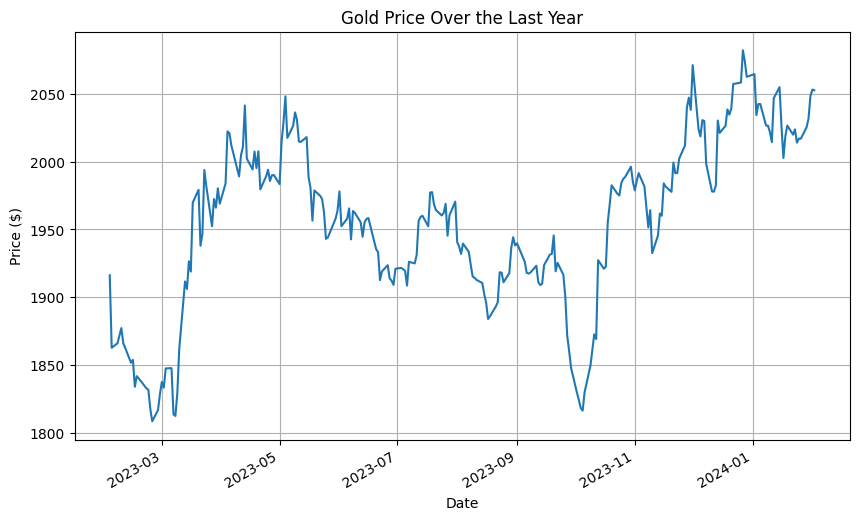

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime

# Set the ticker for gold, usually 'GC=F' for futures
gold_ticker = 'GC=F'

# Calculate the date one year ago from today
end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days=365)

# Fetch historical data for gold
gold_data = yf.download(gold_ticker, start=start_date, end=end_date)

# Plot the closing prices
plt.figure(figsize=(10, 6))
gold_data['Close'].plot()
plt.title('Gold Price Over the Last Year')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.callbacks import EarlyStopping

In [ ]:
import yfinance as yf
import plotly.graph_objs as go

# Fetching gold price data for the last year
gold_data = yf.Ticker("GC=F")  # GC=F is the futures ticker for gold
gold_prices = gold_data.history(period="1y")  # Fetching data for the last year

# Creating the plot
fig = go.Figure()

# Adding the line chart
fig.add_trace(go.Scatter(x=gold_prices.index, y=gold_prices['Close'], mode='lines+markers', name='Gold Price'))

# Updating the layout for better readability
fig.update_layout(
    title='Gold Prices Over the Last Year',
    xaxis_title='Date',
    yaxis_title='Price in USD',
    hovermode='x'  # Shows the hover info at the x-axis level for better readability
)

# Show the figure
fig.show()


In [ ]:
from tensorflow.keras.models import load_model

# Path to your saved model
model_path = 'LSTM_Model2.h5'

# Load the model
model = load_model(model_path)


In [ ]:
import yfinance as yf
import pandas as pd

# Download the last 10 days of gold price data
gold_data = yf.download("GC=F", period="11d", interval="1d")

# Assuming you're interested in the 'Adj Close' column for the LSTM model
new_data_df = gold_data[['Adj Close']]
print(new_data_df)


[*********************100%%**********************]  1 of 1 completed

              Adj Close
Date                   
2024-01-22  2019.800049
2024-01-23  2023.699951
2024-01-24  2013.900024
2024-01-25  2016.900024
2024-01-26  2016.800049
2024-01-29  2025.199951
2024-01-30  2031.500000
2024-01-31  2048.399902
2024-02-01  2053.000000
2024-02-02  2057.100098


In [ ]:
# Normalize the new data
new_data_scaled = scaler.transform(new_data_df)  # Use the same scaler object used during training


In [ ]:
# Assuming the new data is already a sequence that matches the training sequence length
# Reshape the new data for LSTM input
new_data_reshaped = new_data_scaled.reshape(1, new_data_scaled.shape[0], new_data_scaled.shape[1])  # Reshape to [1, 10, 1] if there's only 1 feature (Adj Close)


In [ ]:
# Assuming 'scaler' is your MinMaxScaler object used during training
# and 'new_data_df' is your DataFrame with the new gold prices

# Normalize the new data
new_data_scaled = scaler.transform(new_data_df)

# Reshape the new data for LSTM input
new_data_reshaped = new_data_scaled.reshape(1, new_data_scaled.shape[0], new_data_scaled.shape[1])  # Adjust dimensions as per your model's requirements

# Now 'new_data_reshaped' is ready to be fed into your LSTM model for prediction


In [ ]:
prediction = model.predict(new_data_reshaped)
prediction_original_scale = scaler.inverse_transform(prediction)
print(prediction_original_scale)

1/1 [==============================] - 0s 24ms/step
[[2056.575]]


In [ ]:
!pip install flask-ngrok

from flask import Flask

app = Flask(__name__)

@app.route('/')
def home():
    return 'Hello, this is a simple Flask app running on Google Colab!'

if __name__ == '__main__':
    from flask_ngrok import run_with_ngrok
    run_with_ngrok(app)
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-25:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urll